Kaggle practice for strings and dictionaries

In [477]:
# Libraries Imports
import pandas as pd

In [478]:
# Data Imports
loan_data = pd.read_csv("/Users/lvinjamuri/Desktop/AI- ML/Lending Club/loan/loan.csv")

C:\Users\lvinjamuri\AppData\Local\Temp\ipykernel_9308\322132611.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv("/Users/lvinjamuri/Desktop/AI- ML/Lending Club/loan/loan.csv")


In [479]:
# Set to display all the columns by changing the Pandas display option
pd.set_option("display.max_columns", 111)

# the number of missing items of all columns
pd.set_option("display.max_rows", None)

In [480]:

#drop all the columns (axis=1)
columns_to_drop = ['mths_since_last_delinq',
                   'mths_since_last_record', 
                   'next_pymnt_d', 
                   'num_bc_sats',
                   'mths_since_recent_bc',
                   'mths_since_recent_bc_dlq',
                   'mths_since_recent_inq',
                   'mths_since_recent_revol_delinq',
                   'num_accts_ever_120_pd',
                   'num_actv_bc_tl',
                   'num_actv_rev_tl',
                   'mort_acc',
                   'num_bc_tl',
                   'num_tl_op_past_12m',
                   'num_op_rev_tl',
                   'num_rev_accts',
                   'num_rev_tl_bal_gt_0',
                   'num_sats',
                   'num_tl_120dpd_2m',
                   'num_tl_30dpd',
                   'num_tl_90g_dpd_24m',
                   'pct_tl_nvr_dlq',
                   'percent_bc_gt_75',
                   'tot_hi_cred_lim',
                   'total_bal_ex_mort',
                   'mo_sin_rcnt_tl',
                   'num_il_tl',
                   'mo_sin_rcnt_rev_tl_op',
                   'verification_status_joint',
                   'mo_sin_old_il_acct',
                   'mths_since_last_major_derog',
                   'annual_inc_joint',
                   'dti_joint',
                   'total_bc_limit',
                   'tot_coll_amt',
                   'tot_cur_bal',
                   'open_acc_6m',
                   'open_il_6m',
                   'open_il_12m',
                   'open_il_24m',
                   'mths_since_rcnt_il',
                   'total_bal_il',
                   'il_util',
                   'open_rv_12m',
                   'open_rv_24m',
                   'max_bal_bc',
                   'all_util',
                   'total_rev_hi_lim',
                   'inq_fi',
                   'total_cu_tl',
                   'inq_last_12m',
                   'acc_open_past_24mths',
                   'avg_cur_bal',
                   'bc_open_to_buy',
                   'bc_util',
                   'mo_sin_old_rev_tl_op',
                   'total_il_high_credit_limit',
                   'id',
                   'url',
                   'member_id',
                   'zip_code',
                   'emp_title',
                   'desc',
                   'purpose',
                   'initial_list_status',
                   'policy_code',
                   'delinq_amnt',
                   'tax_liens',
                   'chargeoff_within_12_mths',
                   'acc_now_delinq',
                   'collections_12_mths_ex_med',
                   'title',
                   'out_prncp',
                   'collection_recovery_fee',
                   'sub_grade',
                   'pymnt_plan',
                   'earliest_cr_line',
                   'application_type',
                   'last_credit_pull_d',
                   'addr_state',
                   'funded_amnt',
                   'funded_amnt_inv',
                   'delinq_2yrs',
                   'inq_last_6mths',
                   'open_acc',
                   'revol_bal',
                   'out_prncp_inv',
                   'total_rec_late_fee',	
                   'recoveries',
                   'last_pymnt_d',
                   'last_pymnt_amnt',  
                   'total_pymnt_inv'              
                   ]
final_loan_data  = loan_data.drop(columns_to_drop,axis=1)


In [481]:
(final_loan_data.isna().sum()*100)/len(final_loan_data)  # % of na values in columns

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
emp_length              2.706650
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
dti                     0.000000
pub_rec                 0.000000
revol_util              0.125891
total_acc               0.000000
total_pymnt             0.000000
total_rec_prncp         0.000000
total_rec_int           0.000000
pub_rec_bankruptcies    1.754916
dtype: float64

In [482]:
# Drop all the na values in "emp_length" , "pub_rec_bankruptcies" and "revol_util"

final_loan_data = final_loan_data[final_loan_data['emp_length'].notna()]  
final_loan_data = final_loan_data[final_loan_data['revol_util'].notna()]
final_loan_data = final_loan_data[final_loan_data['pub_rec_bankruptcies'].notna()]

In [483]:
(final_loan_data.isna().sum()*100)/len(final_loan_data)  # % of na values in columns

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
dti                     0.0
pub_rec                 0.0
revol_util              0.0
total_acc               0.0
total_pymnt             0.0
total_rec_prncp         0.0
total_rec_int           0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [484]:
current_loan_status = final_loan_data["loan_status"] !="Current"
final_loan_data = final_loan_data[current_loan_status]
final_loan_data.shape

(36800, 18)

In [485]:
# 'emp_length' remove -  >,< years
final_loan_data['emp_length'] = final_loan_data['emp_length'].replace('(\\d+)\\s*years', r'\1', regex=True)

final_loan_data['emp_length'] = final_loan_data['emp_length'].str.replace(r'\D+', '')


In [486]:
# Store all ordered categorical variables

ordered_categorical = final_loan_data[['home_ownership','verification_status','loan_status']]

# Summarize the count of elements in each column


In [487]:
# 'issue_d' conversion into date format
final_loan_data['issue_d']  = pd.to_datetime(final_loan_data['issue_d'], format='%b-%y')

In [488]:
# 'term' column remove 'months 
# Convert into years
final_loan_data['term'] = final_loan_data['term'].replace('(\\d+)\\s*months',r'\1', regex=True ).astype(int)
final_loan_data['term'] = final_loan_data['term']/12

In [489]:
# int_rate column remove '%' and convert into float
final_loan_data['int_rate'] = final_loan_data['int_rate'].replace('(\\d)\\s*%',r'\1', regex=True).astype(float)

In [490]:
# Working dataframe
final_loan_data.head(5)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,dti,pub_rec,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,pub_rec_bankruptcies
0,5000,3.0,10.65,162.87,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,27.65,0,83.70%,9,5863.155187,5000.00,863.16,0.0
1,2500,5.0,15.27,59.83,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,1.00,0,9.40%,4,1008.710000,456.46,435.17,0.0
2,2400,3.0,15.96,84.33,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,8.72,0,98.50%,10,3005.666844,2400.00,605.67,0.0
3,10000,3.0,13.49,339.31,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,20.00,0,21%,37,12231.890000,10000.00,2214.92,0.0
5,5000,3.0,7.90,156.46,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,11.20,0,28.30%,12,5632.210000,5000.00,632.21,0.0


In [491]:
final_loan_data.shape

(36800, 18)

In [492]:
final_loan_data['emp_length'].value_counts()

emp_length
10+ years    8368
< 1 year     4329
2            4202
3            3947
4            3290
5            3157
1 year       3071
6            2133
7            1686
8            1408
9            1209
Name: count, dtype: int64

In [493]:
final_loan_data.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
dti                     0
pub_rec                 0
revol_util              0
total_acc               0
total_pymnt             0
total_rec_prncp         0
total_rec_int           0
pub_rec_bankruptcies    0
dtype: int64

In [494]:
final_loan_data.dtypes

loan_amnt                        int64
term                           float64
int_rate                       float64
installment                    float64
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
dti                            float64
pub_rec                          int64
revol_util                      object
total_acc                        int64
total_pymnt                    float64
total_rec_prncp                float64
total_rec_int                  float64
pub_rec_bankruptcies           float64
dtype: object

In [495]:
final_loan_data[['loan_status','home_ownership']].value_counts()


loan_status  home_ownership
Fully Paid   RENT              15000
             MORTGAGE          14138
Charged Off  RENT               2667
Fully Paid   OWN                2318
Charged Off  MORTGAGE           2196
             OWN                 385
Fully Paid   OTHER                78
Charged Off  OTHER                18
Name: count, dtype: int64

In [496]:
final_loan_data.groupby(['loan_status'])[['term','int_rate','dti','annual_inc',]].median()

,term,int_rate,dti,annual_inc
loan_status,,,,
Charged Off,3.0,13.79,14.335,54000.0
Fully Paid,3.0,11.49,13.260,60000.0


In [497]:
final_loan_data.groupby(['home_ownership'])[['loan_status']].count()

,loan_status
home_ownership,
MORTGAGE,16334
OTHER,96
OWN,2703
RENT,17667


In [498]:
final_loan_data.groupby(['loan_status','home_ownership', ]).size().reset_index(name='counts')

,loan_status,home_ownership,counts
0,Charged Off,MORTGAGE,2196
1,Charged Off,OTHER,18
2,Charged Off,OWN,385
3,Charged Off,RENT,2667
4,Fully Paid,MORTGAGE,14138
5,Fully Paid,OTHER,78
6,Fully Paid,OWN,2318
7,Fully Paid,RENT,15000


In [499]:
final_loan_data.groupby(['loan_status','term', ]).size().reset_index(name='counts')

,loan_status,term,counts
0,Charged Off,3.0,2943
1,Charged Off,5.0,2323
2,Fully Paid,3.0,24603
3,Fully Paid,5.0,6931


In [500]:

final_loan_data.groupby(['loan_status','int_rate', ]).size()

loan_status  int_rate
Charged Off  5.42         14
             5.79         15
             5.99         18
             6.03          5
             6.17          8
             6.39          1
             6.54         27
             6.62         25
             6.76          5
             6.91         19
             6.92          7
             6.99         11
             7.05          3
             7.14         16
             7.29         16
             7.37          1
             7.40          1
             7.42          1
             7.49         37
             7.51         48
             7.66         22
             7.68          3
             7.74          3
             7.88         35
             7.90         44
             7.91          1
             8.00         10
             8.32          3
             8.49         46
             8.59         11
             8.63          1
             8.88         17
             8.90         35
             8.94    

In [501]:

final_loan_data.groupby(['loan_status', ])["int_rate"].median().reset_index(name='counts')

,loan_status,counts
0,Charged Off,13.79
1,Fully Paid,11.49


In [502]:

final_loan_data.groupby(['loan_status','loan_amnt', ]).size()

loan_status  loan_amnt
Charged Off  1000           32
             1050            1
             1100            1
             1200           19
             1250            1
             1275            1
             1300            4
             1325            3
             1375            1
             1400            7
             1450            2
             1500           39
             1550            1
             1600           14
             1625            1
             1675            1
             1700            2
             1750            5
             1800           11
             1850            1
             1900            1
             1925            1
             1950            1
             2000           55
             2050            2
             2100           11
             2150            1
             2200            9
             2250            4
             2300            3
             2350            1
             240

In [503]:

#final_loan_data.groupby(['loan_status','loan_amnt', ]).size().reset_index(name='counts')

In [504]:

final_loan_data.groupby(['loan_status', ])["loan_amnt"].median().reset_index(name='counts')

,loan_status,counts
0,Charged Off,10000.0
1,Fully Paid,9600.0


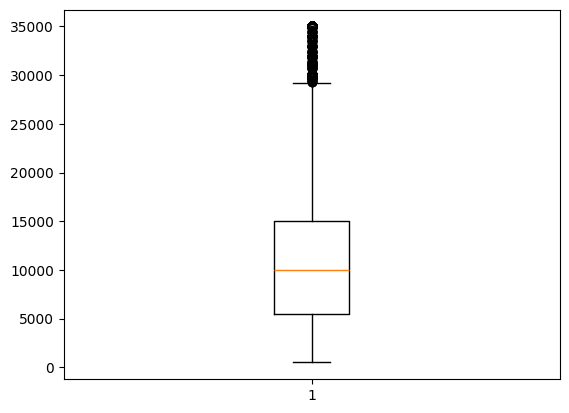

Median salary for loan applicants Rs: 10000.0


In [505]:
import matplotlib.pyplot as plot
import seaborn as sea


plot.boxplot(final_loan_data['loan_amnt'])
plot.show()
print("Median salary for loan applicants Rs:", final_loan_data['loan_amnt'].median())


In [506]:
# Univarients function
def plot_digram(df, column):
    p = plot.subplots(1,2)
    sea.displot(df.loc[df[column].notnull(), column])
    #sea.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(final_loan_data[column])
    p[1].set_xlabel(final_loan_data[column])
    plot.tight_layout()
    plot.show()

AttributeError: 'Figure' object has no attribute 'set_xlabel'

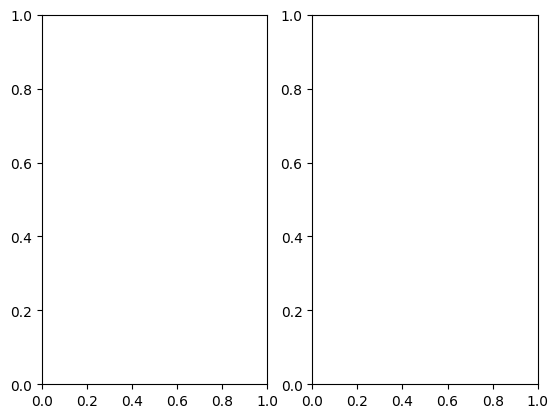

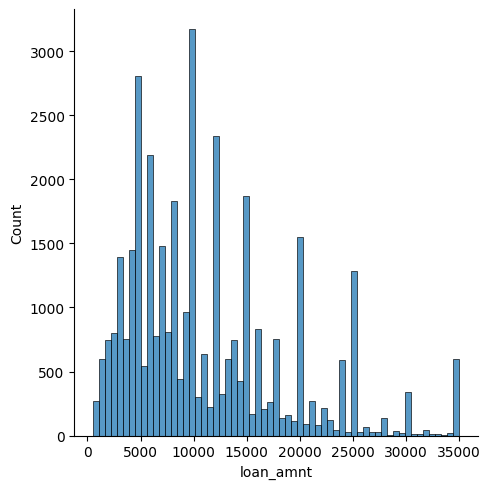

In [507]:
plot_digram(final_loan_data, 'loan_amnt')
#print(loan_df["loan_amnt"].mean())
# describe the Loan Amount
final_loan_data['loan_amnt'].describe()